# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Self-reported life satisfaction, 2011 to 2023 
### 1.2 Fragestellung:
- Welches Land hat die höchste/niedriegste Lebenszufriedenheit? Was sind die Gründe dafür? 
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
-




### 1.4 Daten beschaffen und laden

In [6]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [43]:
df = pd.read_csv('happiness-cantril-ladder.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Cantril ladder score']) 
df.head()

,Gebiet,Code,Jahr,Cantril ladder score
0,Afghanistan,AFG,2011,4.25835
1,Afghanistan,AFG,2014,3.57500
2,Afghanistan,AFG,2015,3.36000
3,Afghanistan,AFG,2016,3.79400
4,Afghanistan,AFG,2017,3.63150


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

Die Daten sind im Long-Format.

In [4]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Cantril ladder score')
df_pivot.head()

Jahr,2011,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Gebiet,,,,,,,,,,,
Afghanistan,4.258350,3.575000,3.360000,3.794000,3.631500,3.203300,2.566900,2.522900,2.403800,1.859000,1.721000
Africa,4.453107,4.474157,4.395968,4.457408,4.445971,4.511974,4.459995,4.551006,4.517288,4.426524,4.384616
Albania,5.133704,4.959000,4.655000,4.644000,4.586000,4.718600,4.882700,5.117400,5.198800,5.277300,5.304200
Algeria,5.367827,5.605000,6.355000,5.872000,5.294600,5.211300,5.005100,4.887100,5.122300,5.329100,5.363500
Angola,4.178380,4.033000,3.866000,3.795000,3.794800,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [44]:
import pandas as pd
df = pd.read_csv('happiness-cantril-ladder.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Cantril ladder score']) 
df

,Gebiet,Code,Jahr,Cantril ladder score
0,Afghanistan,AFG,2011,4.25835
1,Afghanistan,AFG,2014,3.57500
2,Afghanistan,AFG,2015,3.36000
3,Afghanistan,AFG,2016,3.79400
4,Afghanistan,AFG,2017,3.63150
...,...,...,...,...
1782,Zimbabwe,ZWE,2019,3.29920
1783,Zimbabwe,ZWE,2020,3.14480
1784,Zimbabwe,ZWE,2021,2.99510
1785,Zimbabwe,ZWE,2022,3.20350


In [73]:
df.dtypes

Gebiet     object
Code       object
Jahr        int64
score     float64
dtype: object

## 3.1 Analyse Gebiete ##

In [6]:
len(df['Gebiet'].unique())


178

In [77]:
df['Gebiet'].value_counts()

Gebiet
Afghanistan    11
Niger          11
Montenegro     11
Morocco        11
Myanmar        11
               ..
Djibouti        2
Puerto Rico     2
Cuba            1
Guyana          1
Oman            1
Name: count, Length: 178, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

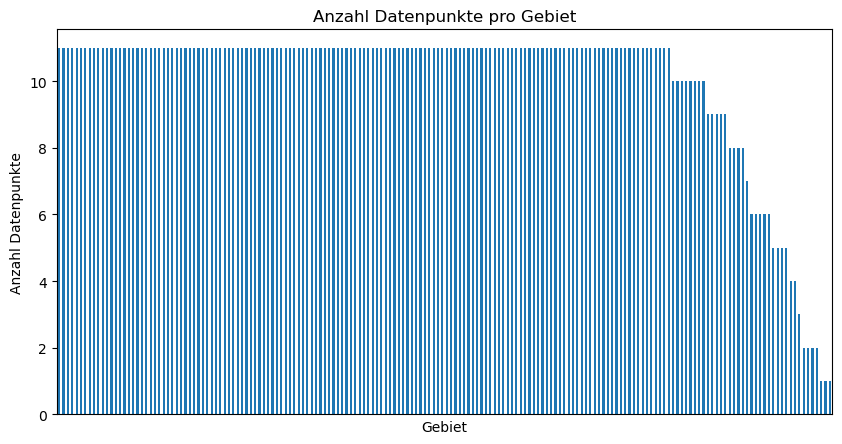

In [78]:
df['Gebiet'].value_counts().plot(kind='bar', xticks=[],ylabel='Anzahl Datenpunkte',figsize= (10,5), title='Anzahl Datenpunkte pro Gebiet')

## 3.2 Analyse Codes ##

In [20]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  169


In [19]:
df['Code'].value_counts()

Code
AFG    11
PHL    11
MNE    11
MAR    11
MMR    11
       ..
PRI     2
SUR     2
CUB     1
OMN     1
GUY     1
Name: count, Length: 168, dtype: int64

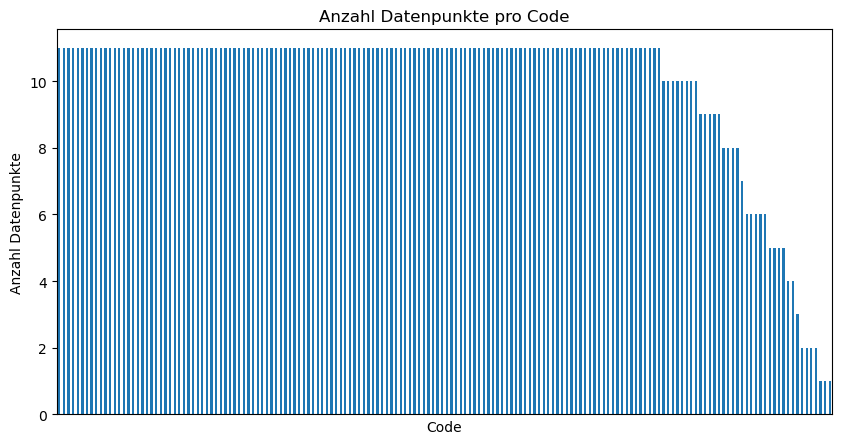

In [18]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte',figsize= (10,5), title='Anzahl Datenpunkte pro Code');

In [33]:
value_counts = df['Gebiet'].value_counts()
low_data_countries = value_counts[value_counts < 11]
print(low_data_countries)

Gebiet
Azerbaijan                      10
Laos                            10
Yemen                           10
Kuwait                          10
Libya                           10
Mozambique                      10
Gabon                           10
Namibia                         10
Comoros                          9
Democratic Republic of Congo     9
Belarus                          9
Turkmenistan                     9
Rwanda                           9
Lesotho                          8
Northern Cyprus                  8
Haiti                            8
Burundi                          8
Trinidad and Tobago              7
Central African Republic         6
Eswatini                         6
Syria                            6
Gambia                           6
Qatar                            6
Bhutan                           5
Angola                           5
Sudan                            5
South Sudan                      5
Belize                           4
Somalia      

## 3.3 Analyse Jahr ##

In [79]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  11


#### Anzahl Datenpunkte pro Jahr ####

In [80]:
df['Jahr'].value_counts().sort_index()

Jahr
2011    167
2014    169
2015    168
2016    166
2017    167
2018    167
2019    164
2020    160
2021    157
2022    148
2023    154
Name: count, dtype: int64

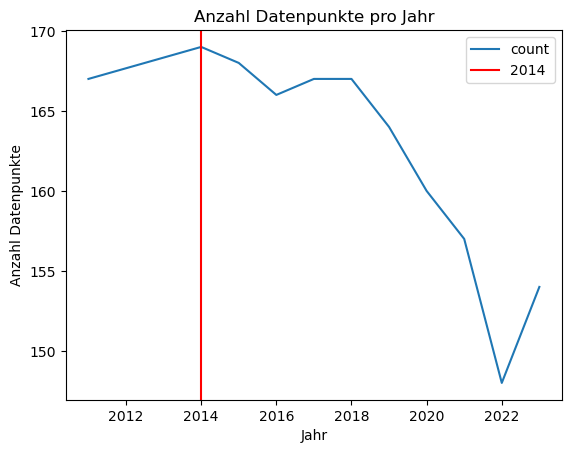

In [8]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2014, color='red',label='2014')
g.legend()  

In [29]:
print('Mittelwert:',df['Cantril ladder score'].mean())
print('Median:',df['Cantril ladder score'].median())
print('Standardabweichung:',df['Cantril ladder score'].std())
print('5% Perzentil:',df['Cantril ladder score'].quantile(0.05))
print('99.9% Perzentil:',df['Cantril ladder score'].quantile(0.999))
print('Max:',df['Cantril ladder score'].max())
print('Min:',df['Cantril ladder score'].min())

Mittelwert: 5.455646661275882
Median: 5.4318
Standardabweichung: 1.1146867665403009
5% Perzentil: 3.59783
99.9% Perzentil: 7.825515400000003
Max: 7.85574
Min: 1.721


In [28]:
df.describe()

,Jahr,Cantril ladder score
count,1787.000000,1787.000000
mean,2017.702854,5.455647
std,3.470175,1.114687
min,2011.000000,1.721000
25%,2015.000000,4.594467
50%,2018.000000,5.431800
75%,2021.000000,6.298900
max,2023.000000,7.855740


In [12]:
df.sort_values(by='Cantril ladder score', ascending=False).head(10)

,Gebiet,Code,Jahr,Cantril ladder score
418,Denmark,DNK,2011,7.85574
521,Finland,FIN,2020,7.84210
522,Finland,FIN,2021,7.82100
520,Finland,FIN,2019,7.80870
523,Finland,FIN,2022,7.80420
519,Finland,FIN,2018,7.76890
524,Finland,FIN,2023,7.74070
424,Denmark,DNK,2019,7.64560
426,Denmark,DNK,2021,7.63620
518,Finland,FIN,2017,7.63210


In [31]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=[score_data],width=0.5,color="skyblue",showmeans=True,meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": 8},whis=[0, 100] )

plt.title("Boxplot: Cantril Ladder Score", fontsize=16)
plt.ylabel("Cantril Ladder Score")
plt.xticks([]) 

plt.show()

NameError: name 'score_data' is not defined

<Figure size 600x800 with 0 Axes>

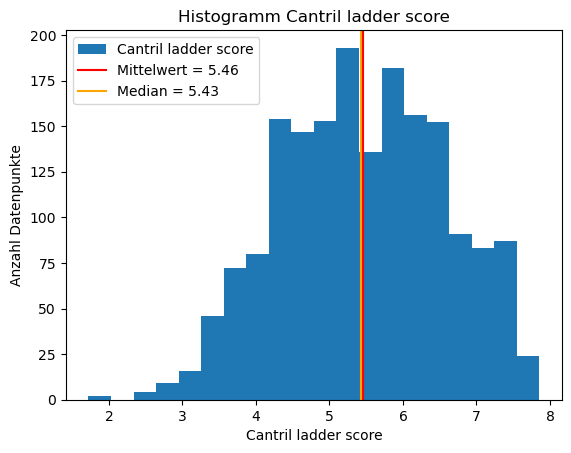

In [23]:

g = df['Cantril ladder score'].plot(kind='hist', bins=20, title='Histogramm Cantril ladder score', 
                           xlabel='Cantril ladder score', ylabel='Anzahl Datenpunkte')
mean = df['Cantril ladder score'].mean()
g.axvline(x=df['Cantril ladder score'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  


median = df['Cantril ladder score'].median()
g.axvline(x=df['Cantril ladder score'].median(), color='orange',label=  f'Median = {median:.2f}')  

g.legend()


## 4. Analyse ##

In [45]:
diffs = df_pivot[2023]-df_pivot[2014]   
diffs = diffs.sort_values().dropna()  
diffs

NameError: name 'df_pivot' is not defined

In [46]:
diff_sel = (diffs < -1) | (diffs > 1) 
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen des Cantril ladder score 2011-2020')

NameError: name 'diffs' is not defined

In [39]:
Gebiets_liste = diffs[diff_sel].index.tolist()  
print(Gebiets_liste)

NameError: name 'diffs' is not defined

In [27]:
max_score = df['Cantril ladder score'].max()
min_score = df['Cantril ladder score'].min()
max_score_gebiet = df[df['Cantril ladder score'] == max_score]['Gebiet']
min_score_gebiet = df[df['Cantril ladder score'] == min_score]['Gebiet']


print(f"Der höchste Cantril ladder score ist {max_score} und kommt aus den Gebieten: {max_score_gebiet.tolist()}")
print(f"Der niedrigste Cantril ladder score ist {min_score} und kommt aus den Gebieten: {min_score_gebiet.tolist()}")

Der höchste Cantril ladder score ist 7.85574 und kommt aus den Gebieten: ['Denmark']
Der niedrigste Cantril ladder score ist 1.721 und kommt aus den Gebieten: ['Afghanistan']


In [57]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [64]:
import pandas as pd
df = pd.read_csv('life-satisfaction-vs-life-expectancy.filtered.csv.',skiprows=1,
                 names=['Entity','Code','Year absolut','Life expectancy','Cantril ladder score','Population','Gebiet','Year','Endyear']) 

df.head()

,Entity,Code,Year absolut,Life expectancy,Cantril ladder score,Population,Gebiet,Year,Endyear
0,Afghanistan,AFG,2011.0,61.250,4.25835,29347709.0,Asia,2011,2023
1,Afghanistan,AFG,2012.0,61.735,NaN,30560036.0,Asia,2012,2023
2,Afghanistan,AFG,2013.0,62.188,NaN,31622708.0,Asia,2013,2023
3,Afghanistan,AFG,2014.0,62.260,3.57500,32792527.0,Asia,2014,2023
4,Afghanistan,AFG,2015.0,62.270,3.36000,33831765.0,Asia,2015,2023


In [65]:
df = df.drop(columns=['Year absolut', 'Population', 'Endyear'])

df.head()

,Entity,Code,Life expectancy,Cantril ladder score,Gebiet,Year
0,Afghanistan,AFG,61.250,4.25835,Asia,2011
1,Afghanistan,AFG,61.735,NaN,Asia,2012
2,Afghanistan,AFG,62.188,NaN,Asia,2013
3,Afghanistan,AFG,62.260,3.57500,Asia,2014
4,Afghanistan,AFG,62.270,3.36000,Asia,2015
